In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

## Create data from power spectrum

This function is set up to create a single Lorentzian peak and will be used to create several "modes". The mode height and central frequency will be set by the factor $i$ relative to the other input parameters. The mode height will be reduced by a factor $i^2$, and the central freuqency will be shifted by a factor $i$.

10000


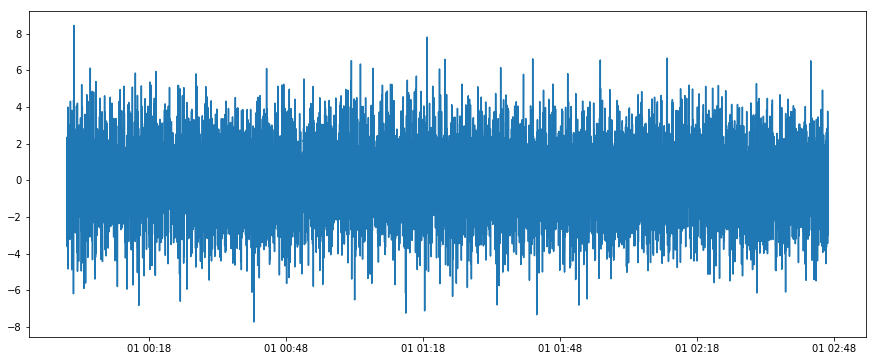

In [2]:
mu = 0
sigma = 2
l = 10000
df = pd.DataFrame({'data':np.random.normal(mu, sigma, l)}, index=[datetime.datetime(1992,1,1,0,0) + datetime.timedelta(seconds=t.astype(float)) for t in np.arange(0,l)])

fig, ax = plt.subplots(figsize=(15,6))
ax.plot(df)
print(len(df))

Now we should re-do the FFT to ensure that the PSD comes out the same as what we started with.

Begin FFT...
Pre-mask times length: 10000
Fill is: 1.0
Post-mask times length: 10000
TS_var: 3.9609518420266134
FD: 3.960951842026614


/home/exr007/.local/lib/python3.5/site-packages/astropy/stats/lombscargle/implementations/fast_impl.py:93: RuntimeWarning: invalid value encountered in true_divide
  tan_2omega_tau = (S2 - 2 * S * C) / (C2 - (C * C - S * S))


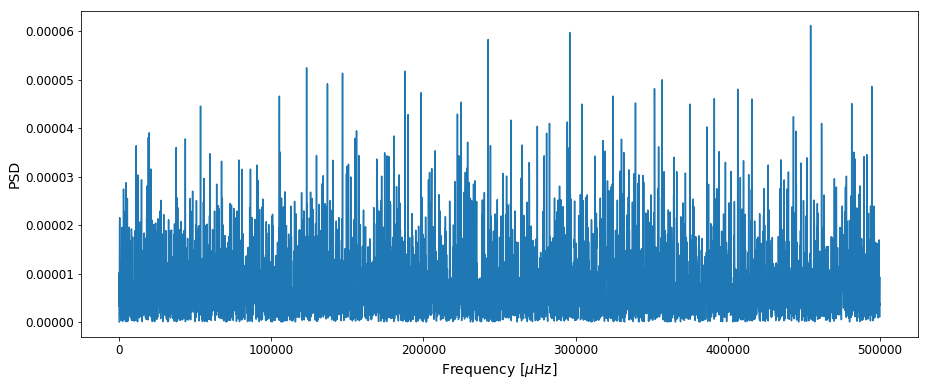

Time-series variance: 3.9609518420266134
Peak at nu_0 = 454400.0 muHz


In [3]:
import timeseries_FFT

def FFT(start, end, data = None, oversample = False, plot=False):
    print('Begin FFT...')
    # data = self.Vn_df[0] # set FFT data
    data = data
    error = data*0.0001

    f = timeseries_FFT.timeseries_FFT_plot(data, error, start, end, '', 'PSD', maj_tick = .5, min_tick=.05)
    freqs, power, times = f.FT_data()
    if plot == True:
        f.make_plot()
    return freqs, power, times

# Re-compute the power spectrum
freqs, power, times = FFT(start = pd.to_datetime(df.index.values[0]), end = pd.to_datetime(df.index.values[-1]), data = df['data'], plot=False, oversample=False)

# Plot power re-calculated power spectrum
fig, ax = plt.subplots(figsize=(15,6))
ax.set_xlabel('Frequency [$\mu$Hz]', fontsize=14)
ax.set_ylabel('PSD', fontsize=14)
ax.tick_params(labelsize=12)
ax.plot(freqs, power)
plt.show()

print('Time-series variance: %s'%(np.std(df['data'])**2))
print("Peak at nu_0 = %s muHz"%freqs[np.argmax(power)])

5000
                         data    x_data
1992-01-01 00:00:00 -2.484915 -2.484915
1992-01-01 00:00:01 -0.308773 -0.308773
1992-01-01 00:00:02  2.357169  2.357169
1992-01-01 00:00:03 -3.617204 -3.617204
1992-01-01 00:00:04 -0.061545 -0.061545
1992-01-01 00:00:05  0.017618  0.017618
1992-01-01 00:00:06 -1.350035 -1.350035
1992-01-01 00:00:07 -2.315518 -2.315518
1992-01-01 00:00:08 -1.527525 -1.527525
1992-01-01 00:00:09  1.774519  1.774519
1992-01-01 00:00:10 -0.493286 -0.493286
1992-01-01 00:00:11  3.994299  3.994299
1992-01-01 00:00:12  1.089100  1.089100
1992-01-01 00:00:13 -0.901115 -0.901115
1992-01-01 00:00:14 -4.837104 -4.837104
1992-01-01 00:00:15  0.971844  0.971844
1992-01-01 00:00:16 -3.053923 -3.053923
1992-01-01 00:00:17  2.551324  2.551324
1992-01-01 00:00:18 -3.241294 -3.241294
1992-01-01 00:00:19  0.929593  0.929593
1992-01-01 00:00:20 -0.196441 -0.196441
1992-01-01 00:00:21 -2.458969 -2.458969
1992-01-01 00:00:22  1.949592  1.949592
1992-01-01 00:00:23 -0.963601 -0.96

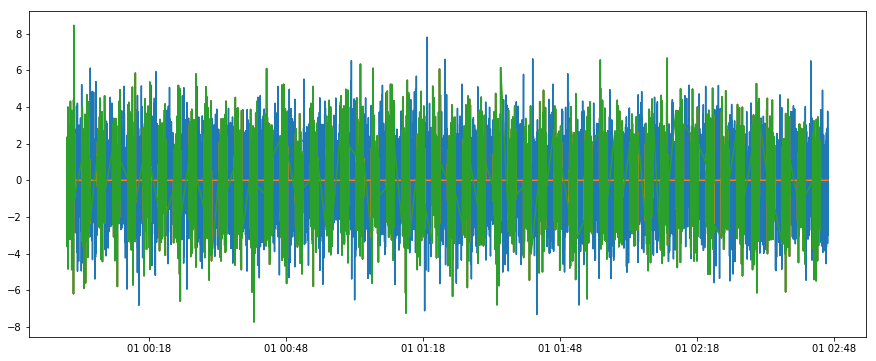

In [4]:
start = 0 # start from 100
take = 100 # retain 100 points at a time
skip = 100 # skip every 100 points at a time
indices = np.concatenate([np.arange(i, i + take) for i in range(start, len(df), take + skip)])
print(len(indices))
#print(tst_ary[indices])
t2 = df['data'].index.values[indices]
df2 = df['data'].values[indices]

df2 = pd.DataFrame({'x_data':df2}, index=t2)
df = pd.concat([df, df2], axis=1)
df.fillna(0, inplace=True)
df2 = df2[np.isfinite(df2)]

print(df)

fig, ax = plt.subplots(figsize=(15,6))

ax.plot(df)
ax.plot(df2)

Begin FFT...
Pre-mask times length: 5000
Fill is: 1.0
Post-mask times length: 5000
TS_var: 3.967032370657523
FD: 3.9670323706575226


/home/exr007/.local/lib/python3.5/site-packages/astropy/stats/lombscargle/implementations/fast_impl.py:93: RuntimeWarning: invalid value encountered in true_divide
  tan_2omega_tau = (S2 - 2 * S * C) / (C2 - (C * C - S * S))


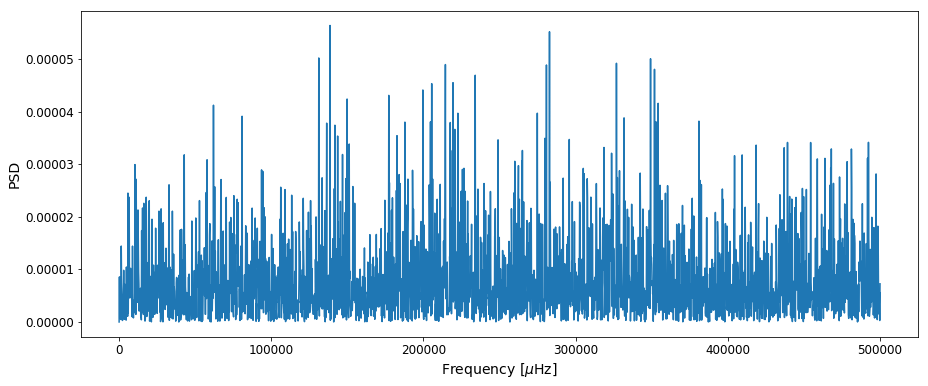

Begin FFT...
Pre-mask times length: 10000
Fill is: 0.5
Post-mask times length: 10000
TS_var: 3.968958059433501
FD: 3.9689580594335006


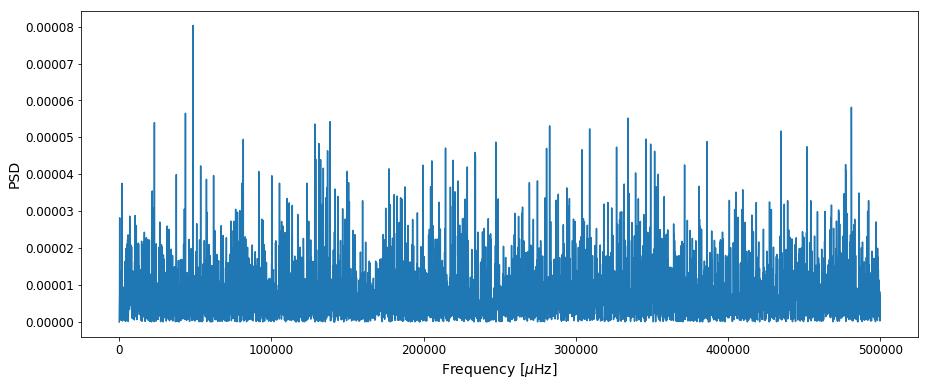

Time-series variance: 1.9844790297167505
Peak at nu_0 = 48500.0 muHz


In [6]:
# Non-duty cycle corrected
# Re-compute the power spectrum
freqs, power, times = FFT(start = pd.to_datetime(df2.index.values[0]), end = pd.to_datetime(df2.index.values[-1]), data = df2['x_data'], plot=False, oversample=False)

# Plot power re-calculated power spectrum
fig, ax = plt.subplots(figsize=(15,6))
ax.set_xlabel('Frequency [$\mu$Hz]', fontsize=14)
ax.set_ylabel('PSD', fontsize=14)
ax.tick_params(labelsize=12)
ax.plot(freqs, power)
plt.show()


#Now for duty cycle corrected

# Re-compute the power spectrum
freqs, power, times = FFT(start = pd.to_datetime(df.index.values[0]), end = pd.to_datetime(df.index.values[-1]), data = df['x_data'], plot=False, oversample=False)

# Plot power re-calculated power spectrum
fig, ax = plt.subplots(figsize=(15,6))
ax.set_xlabel('Frequency [$\mu$Hz]', fontsize=14)
ax.set_ylabel('PSD', fontsize=14)
ax.tick_params(labelsize=12)
ax.plot(freqs, power)
plt.show()

print('Time-series variance: %s'%(np.std(df['x_data'])**2))
print("Peak at nu_0 = %s muHz"%freqs[np.argmax(power)])

## sine time

10000


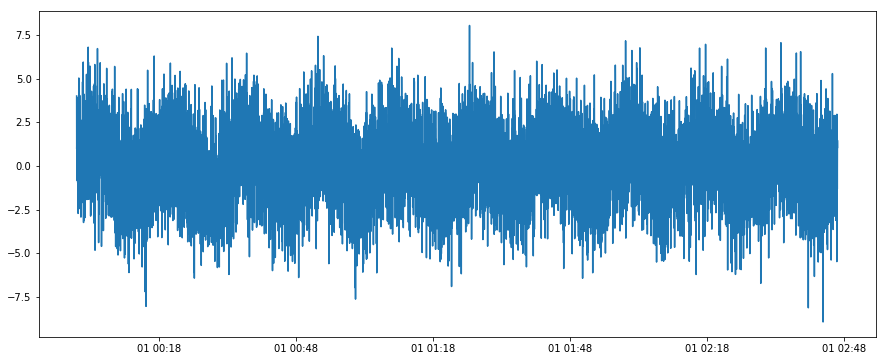

In [13]:
A = 1
f = 1000
y = A*np.sin(2*np.pi*np.arange(0,l)/f) + np.random.normal(mu, sigma, l)
df = pd.DataFrame({'data':y}, index=[datetime.datetime(1992,1,1,0,0) + datetime.timedelta(seconds=t.astype(float)) for t in np.arange(0,l)])

fig, ax = plt.subplots(figsize=(15,6))
ax.plot(df)
print(len(df))

Begin FFT...
Pre-mask times length: 10000
Fill is: 1.0
Post-mask times length: 10000
TS_var: 4.489287655573385
FD: 4.489287655573385


/home/exr007/.local/lib/python3.5/site-packages/astropy/stats/lombscargle/implementations/fast_impl.py:93: RuntimeWarning: invalid value encountered in true_divide
  tan_2omega_tau = (S2 - 2 * S * C) / (C2 - (C * C - S * S))


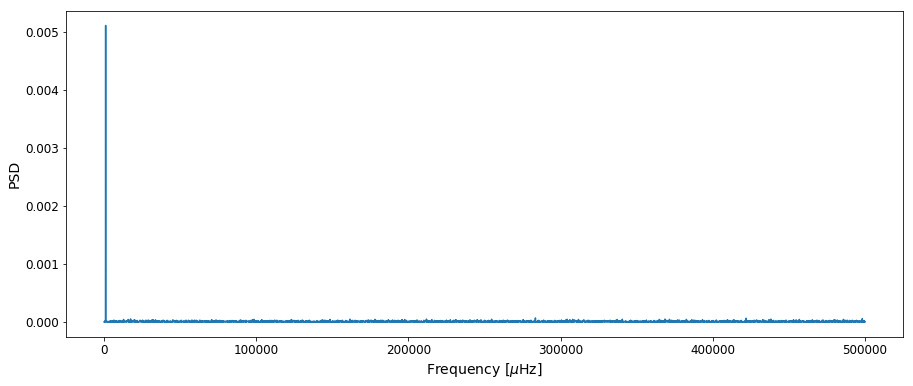

Time-series variance: 4.489287655573385
Peak at nu_0 = 1000.0 muHz


In [14]:
# Re-compute the power spectrum
freqs, power, times = FFT(start = pd.to_datetime(df.index.values[0]), end = pd.to_datetime(df.index.values[-1]), data = df['data'], plot=False, oversample=False)

# Plot power re-calculated power spectrum
fig, ax = plt.subplots(figsize=(15,6))
ax.set_xlabel('Frequency [$\mu$Hz]', fontsize=14)
ax.set_ylabel('PSD', fontsize=14)
ax.tick_params(labelsize=12)
ax.plot(freqs, power)
plt.show()

print('Time-series variance: %s'%(np.std(df['data'])**2))
print("Peak at nu_0 = %s muHz"%freqs[np.argmax(power)])

5000
                         data    x_data
1992-01-01 00:00:00  4.017828  4.017828
1992-01-01 00:00:01  0.985572  0.985572
1992-01-01 00:00:02  1.197784  1.197784
1992-01-01 00:00:03  0.050769  0.050769
1992-01-01 00:00:04 -0.736308 -0.736308
1992-01-01 00:00:05  0.112915  0.112915
1992-01-01 00:00:06  2.184455  2.184455
1992-01-01 00:00:07  2.439078  2.439078
1992-01-01 00:00:08 -0.839926 -0.839926
1992-01-01 00:00:09 -0.720848 -0.720848
1992-01-01 00:00:10 -0.677427 -0.677427
1992-01-01 00:00:11  0.152512  0.152512
1992-01-01 00:00:12 -0.559067 -0.559067
1992-01-01 00:00:13  0.011694  0.011694
1992-01-01 00:00:14 -0.943378 -0.943378
1992-01-01 00:00:15  1.536357  1.536357
1992-01-01 00:00:16 -0.522534 -0.522534
1992-01-01 00:00:17 -2.516951 -2.516951
1992-01-01 00:00:18 -1.248299 -1.248299
1992-01-01 00:00:19  0.109755  0.109755
1992-01-01 00:00:20 -2.717802 -2.717802
1992-01-01 00:00:21 -1.591469 -1.591469
1992-01-01 00:00:22 -1.160741 -1.160741
1992-01-01 00:00:23  0.556913  0.55

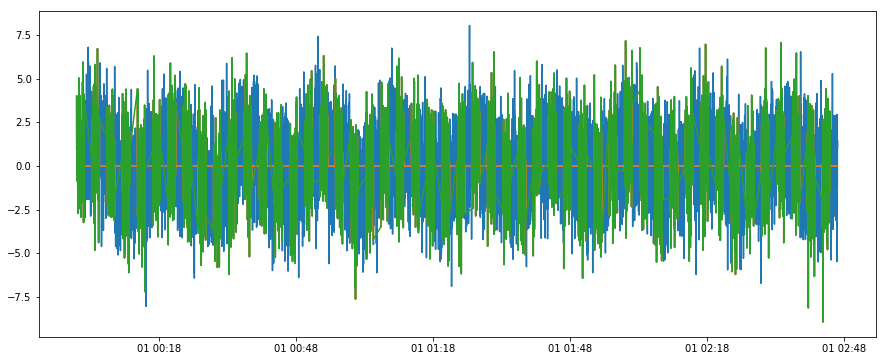

In [15]:
start = 0 # start from 100
take = 100 # retain 100 points at a time
skip = 100 # skip every 100 points at a time
indices = np.concatenate([np.arange(i, i + take) for i in range(start, len(df), take + skip)])
print(len(indices))
#print(tst_ary[indices])
t2 = df['data'].index.values[indices]
df2 = df['data'].values[indices]

df2 = pd.DataFrame({'x_data':df2}, index=t2)
df = pd.concat([df, df2], axis=1)
df.fillna(0, inplace=True)
df2 = df2[np.isfinite(df2)]

print(df)

fig, ax = plt.subplots(figsize=(15,6))

ax.plot(df)
ax.plot(df2)

Begin FFT...
Pre-mask times length: 5000
Fill is: 1.0
Post-mask times length: 5000
TS_var: 4.445793441646168
FD: 4.445793441646167


/home/exr007/.local/lib/python3.5/site-packages/astropy/stats/lombscargle/implementations/fast_impl.py:93: RuntimeWarning: invalid value encountered in true_divide
  tan_2omega_tau = (S2 - 2 * S * C) / (C2 - (C * C - S * S))


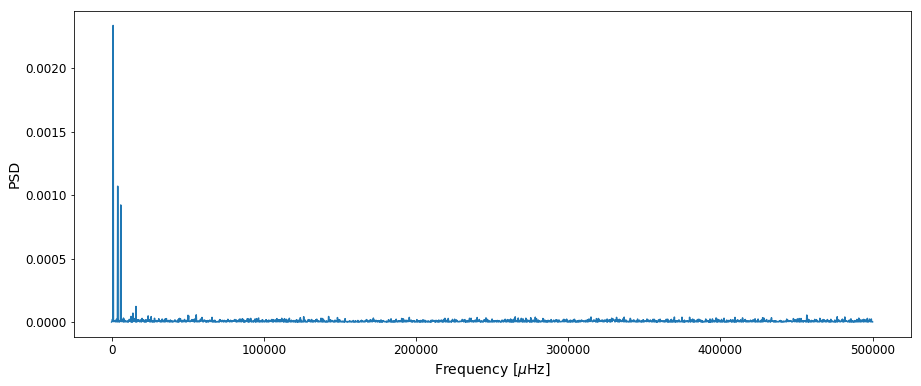

Begin FFT...
Pre-mask times length: 10000
Fill is: 0.5
Post-mask times length: 10000
TS_var: 4.445797472453232
FD: 4.445797472453233


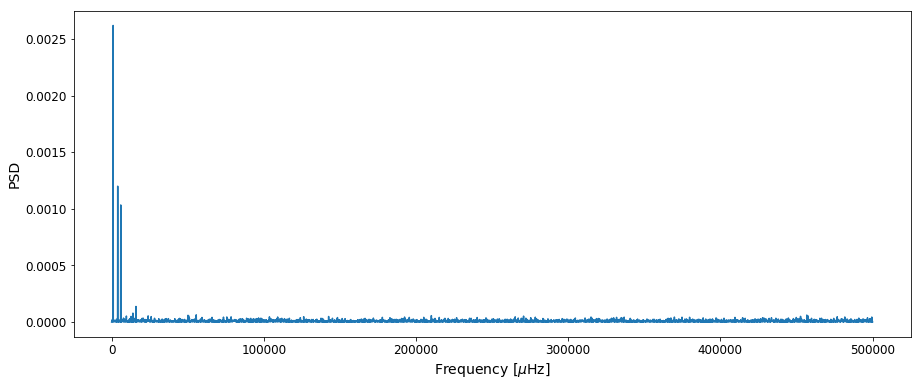

Time-series variance: 2.222898736226616
Peak at nu_0 = 1000.0 muHz


In [16]:
# Non-duty cycle corrected
# Re-compute the power spectrum
freqs, power, times = FFT(start = pd.to_datetime(df2.index.values[0]), end = pd.to_datetime(df2.index.values[-1]), data = df2['x_data'], plot=False, oversample=False)

# Plot power re-calculated power spectrum
fig, ax = plt.subplots(figsize=(15,6))
ax.set_xlabel('Frequency [$\mu$Hz]', fontsize=14)
ax.set_ylabel('PSD', fontsize=14)
ax.tick_params(labelsize=12)
ax.plot(freqs, power)
plt.show()


#Now for duty cycle corrected

# Re-compute the power spectrum
freqs, power, times = FFT(start = pd.to_datetime(df.index.values[0]), end = pd.to_datetime(df.index.values[-1]), data = df['x_data'], plot=False, oversample=False)

# Plot power re-calculated power spectrum
fig, ax = plt.subplots(figsize=(15,6))
ax.set_xlabel('Frequency [$\mu$Hz]', fontsize=14)
ax.set_ylabel('PSD', fontsize=14)
ax.tick_params(labelsize=12)
ax.plot(freqs, power)
plt.show()

print('Time-series variance: %s'%(np.std(df['x_data'])**2))
print("Peak at nu_0 = %s muHz"%freqs[np.argmax(power)])